# Step 1: Import modules

In [ ]:
import numpy as np
import pandas as pd
import math
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis

# Step 2: Read the dataset

In [ ]:
cptrp_lab = pd.read_csv("Computer-Repair-Times.csv")
cptrp_lab.head()

,sample,time
0,1,18
1,2,15
2,3,17
3,4,9
4,5,37


# Step 3: Rename (Optional)

In [ ]:
rpt=cptrp_lab.time

# Start doing the statistics

## 1. Finding mean of Repair Time (time)

##### Average/Mean formula:
## $\bar{x}=\frac{\sum_{i=1}^{n}x_{i}}{n}$

In [ ]:
#using the ordinary method (by formula)
mean_or=sum(rpt)/len(rpt)
mean_or

14.912

In [ ]:
#using available commands from statistical libraries
st.mean(rpt)

14.912

## 2. Finding median of Repair Time (time)
#### To find the median:
<ol>
<li>Arrange the data points from smallest to largest.</li>
<li>If the number of data points is odd, the median is the middle data point in the list.</li>
<li>If the number of data points is even, the median is the average of the two middle data points in the list.</li>
</ol>

In [ ]:
#finding if the number of data points is odd or even
n=len(rpt)

#arrange the data points from smallest to largest - using bubble sort
for i in range(n - 1):
    for j in range(0, n - i - 1):
        if rpt[j] > rpt[j + 1]:
            #swaping position
            rpt[j], rpt[j + 1] = rpt[j + 1], rpt[j]

#The middle index is also the median
middle_index = n // 2
median_or = rpt[middle_index]
median_or

14

In [ ]:
st.median(rpt)

14.0

## 3. Finding variance
#### Variance formula:
## $s^{2}=\frac {\sum_{i=1}^{n}{(x_{i}-\bar{x})}^{2}}{n-1} $

In [ ]:
#using ordinary method (formula)
var_or = sum((x - mean_or) ** 2 for x in rpt) // (n-1)
var_or

35.0

In [ ]:
#tool from lib st
st.variance(rpt)

35.502265060240966

## 4. Finding standard deviation

> Indented block


#### Standard deviation formula:
## $s=\sqrt{s^{2}}=\sqrt{\frac {\sum_{i=1}^{n}{(x_{i}-\bar{x})}^{2}}{n-1}}$

In [ ]:
#using basic math library
stdev_or=math.sqrt(var_or)
stdev_or

5.916079783099616

In [ ]:
st.stdev(rpt)

5.958377720507568

## 5. Finding mode

In [ ]:
#using the ordinary method by coding:

def find_mode(rpt):
    frequency = {}

    # Count the frequency of each number appearing
    for num in rpt:
        if num in frequency:
            frequency[num] += 1
        else:
            frequency[num] = 1

    # Find the highest frequency of occurrence
    max_frequency = max(frequency.values())

    # Create a list containing modes
    modes = []
    for num, freq in frequency.items():
        if freq == max_frequency:
            modes.append(num)

    return modes

mode_or = find_mode(rpt)
mode_or

[12, 15]

In [ ]:
st.mode(rpt)

12

> Explanation: Due to the fact that the if else statement will scan the complete data set and record the values with the greatest number of repeats into a string, the output contains all numbers with the greatest number of repetitions, even in the scenario when the repetitions of these values are identical.

## 6. Finding quantiles

In [ ]:
q1 = np.quantile(rpt, 0.25)
q2 = np.quantile(rpt, 0.5)
q3 = np.quantile(rpt, 0.75)
print(q1)
print(q2)
print(q3)

11.0
14.0
17.0


## 7. Finding skewness
### Skewness formula:
## $skew[x]={\frac{n}{(n-1)(n-2)}}{\sum_{i=1}^{n}({\frac{x_{i}-\bar{x}}{s}})^{3}}$

In [ ]:
#using the formula:
skew_or=(n / ((n - 1) * (n - 2))) * sum(((x - mean_or) / stdev_or) ** 3 for x in rpt)
skew_or

1.7318980834350597

In [ ]:
skew(rpt)

1.6850869214811053

In [ ]:
skew(rpt,bias=False)

1.6952755753095303

## 8. Finding kurtosis
### Kurtosis formula:
## $kurtosis={\frac{n(n+1)}{(n-1)(n-2)(n-3)}}{\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})^{4}}{{s}^{4}}}$

In [ ]:
kurt_or = kurt = (n * (n + 1) / ((n - 1) * (n - 2) * (n - 3))) * sum(((x - mean_or) / stdev_or) ** 4 for x in rpt) - 3 * ((n - 1) ** 2) / ((n - 2) * (n - 3))
kurt_or

4.284709990134218

In [ ]:
kurtosis(rpt)

3.9739941108050942

In [ ]:
kurtosis(rpt,bias=False)

4.079023408828646

## Step 4: Visualizing the dataset

### 1. Histogram

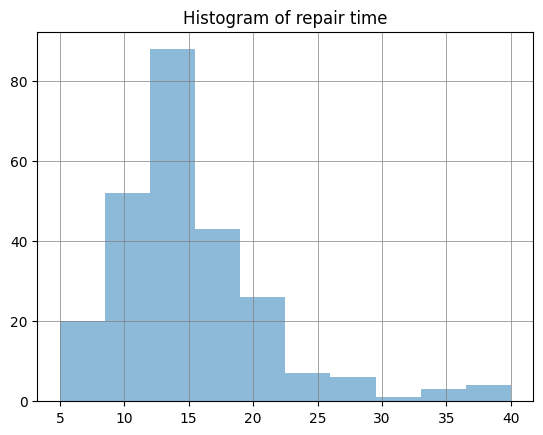

In [ ]:
plt.hist(rpt, alpha=0.5)
plt.title('Histogram of repair time')
plt.grid(True, axis='y', color='grey', linestyle='-', linewidth=0.5)
plt.grid(True, axis='x', color='grey', linestyle='-', linewidth=0.5)
plt.show()

### 2. Boxplot

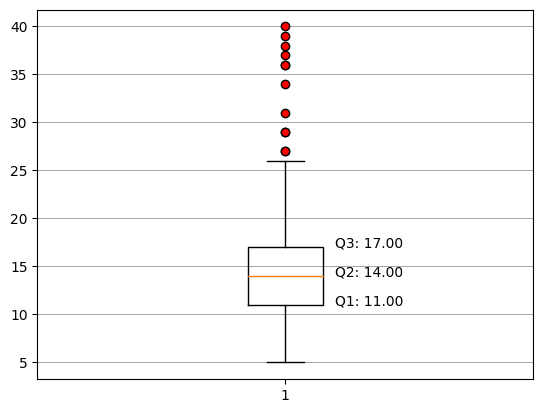

In [ ]:
#using plt lib
outlier_color = dict(markerfacecolor='red')
plt.boxplot(rpt, flierprops=outlier_color)
plt.grid(True, axis='y', color='grey', linestyle='-', linewidth=0.5)
plt.text(1.1, q1, f'Q1: {q1:.2f}')
plt.text(1.1, q2, f'Q2: {q2:.2f}')
plt.text(1.1, q3, f'Q3: {q3:.2f}')
plt.show()